In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

In [2]:
df=pd.read_csv("/content/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df["Gender"]=df["Gender"].fillna(df["Gender"].mode()[0])

In [5]:
le=LabelEncoder()
df["Gender"]=le.fit_transform(df["Gender"])

In [6]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [7]:
df.drop("CustomerID",axis=1,inplace=True)

In [10]:
wcss=[]
for i in range(1,21):
  km=KMeans(n_clusters = i)
  km.fit(df)
  wcss.append(km.inertia_)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

In [11]:
wcss

[308862.06000000006,
 212889.44245524303,
 143391.59236035676,
 104414.67534220168,
 75399.61541401484,
 58348.641363315044,
 51201.740785418944,
 44391.82080487078,
 40874.58581168832,
 37518.47479304321,
 34474.43517505886,
 32196.571909340655,
 30230.060892538837,
 27828.25558381247,
 26599.973392348395,
 24687.009018759018,
 23294.460524361264,
 21904.382384364,
 20603.293192918194,
 20008.10695050563]

Text(0.5, 1.0, 'Cluster Analysis')

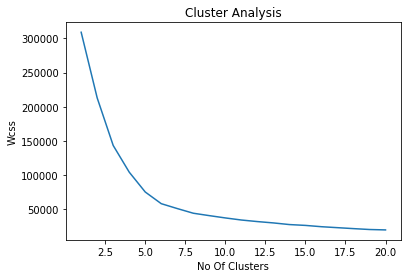

In [12]:
plt.plot(range(1,21),wcss)
plt.xlabel("No Of Clusters")
plt.ylabel("Wcss")
plt.title("Cluster Analysis")

In [19]:
kmeans=KMeans(n_clusters=10,random_state=4)
y_pred=kmeans.fit_predict(df)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [20]:
y_pred

array([5, 4, 5, 4, 5, 4, 8, 4, 8, 4, 8, 4, 8, 4, 8, 4, 5, 4, 5, 4, 5, 4,
       8, 4, 8, 4, 5, 4, 5, 4, 8, 4, 8, 4, 8, 4, 5, 4, 5, 4, 1, 4, 5, 0,
       5, 4, 1, 0, 5, 5, 1, 0, 0, 1, 1, 6, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       6, 1, 0, 0, 1, 6, 1, 1, 1, 0, 6, 6, 0, 6, 1, 6, 1, 6, 0, 6, 1, 0,
       0, 6, 1, 0, 6, 6, 0, 0, 6, 0, 6, 0, 0, 6, 1, 0, 6, 0, 1, 6, 1, 1,
       1, 0, 6, 0, 0, 0, 1, 6, 6, 6, 0, 6, 6, 3, 0, 3, 6, 3, 2, 3, 2, 3,
       0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0, 3, 2, 3, 6, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 6, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 7, 3, 7, 3, 7, 3, 7, 9, 7, 9, 7, 9, 7, 9, 7, 9, 7, 9,
       7, 9], dtype=int32)

In [21]:
df["Clusters"]=kmeans.labels_

In [22]:
df["Clusters"]

0      5
1      4
2      5
3      4
4      5
      ..
195    9
196    7
197    9
198    7
199    9
Name: Clusters, Length: 200, dtype: int32

<Axes: >

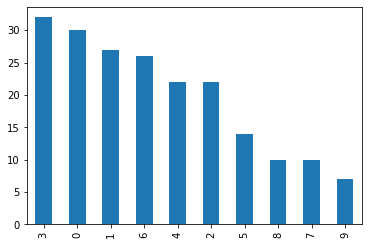

In [23]:
df["Clusters"].value_counts().plot(kind='bar')

In [24]:
from sklearn.metrics import silhouette_score
print(silhouette_score(df.iloc[:,:-1],labels=df["Clusters"]))

0.38401284453015305


In [25]:
kmeans.cluster_centers_

array([[3.66666667e-01, 2.44000000e+01, 5.68333333e+01, 5.00000000e+01,
        1.00000000e-01],
       [4.81481481e-01, 6.14444444e+01, 5.11851852e+01, 5.04444444e+01,
        6.00000000e+00],
       [6.81818182e-01, 4.10000000e+01, 8.01818182e+01, 1.26818182e+01,
        1.00000000e+00],
       [4.68750000e-01, 3.26250000e+01, 8.03750000e+01, 8.29375000e+01,
        6.71875000e+00],
       [4.09090909e-01, 2.52727273e+01, 2.57272727e+01, 7.93636364e+01,
        5.00000000e+00],
       [2.85714286e-01, 3.65714286e+01, 2.87142857e+01, 3.12857143e+01,
        2.57142857e+00],
       [3.84615385e-01, 4.61923077e+01, 6.06153846e+01, 4.61538462e+01,
        2.07692308e+00],
       [3.00000000e-01, 4.10000000e+01, 1.09700000e+02, 2.20000000e+01,
        9.00000000e+00],
       [5.00000000e-01, 5.23000000e+01, 2.45000000e+01, 9.20000000e+00,
        7.50000000e+00],
       [4.28571429e-01, 3.30000000e+01, 1.14714286e+02, 7.84285714e+01,
        4.00000000e+00]])